In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Cambia esta ruta a donde tengas la carpeta en tu Drive
base_path = "/content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy"
os.listdir(base_path)


['acoustic.zip',
 'vibration.zip',
 'current,temp.zip',
 'acoustic',
 'current,temp',
 'vibration']

In [3]:
import zipfile

zip_files = ["acoustic.zip", "current,temp.zip", "vibration.zip"]

for zf in zip_files:
    path = os.path.join(base_path, zf)
    extract_path = os.path.join(base_path, zf.replace(".zip", ""))
    if not os.path.exists(extract_path):
        with zipfile.ZipFile(path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
    print(f"✅ Extraído: {zf} → {extract_path}")


✅ Extraído: acoustic.zip → /content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/acoustic
✅ Extraído: current,temp.zip → /content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/current,temp
✅ Extraído: vibration.zip → /content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/vibration


In [4]:
for folder in ["acoustic", "current,temp", "vibration"]:
    folder_path = os.path.join(base_path, folder)
    print(f"\n📂 Archivos en {folder_path}:")
    print(os.listdir(folder_path)[:10])  # muestra primeros 10



📂 Archivos en /content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/acoustic:
['0Nm_BPFI_03.mat', '0Nm_BPFI_10.mat', '0Nm_BPFO_03.mat', '0Nm_BPFO_10.mat', '0Nm_Normal.mat']

📂 Archivos en /content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/current,temp:
['0Nm_BPFI_03.tdms', '0Nm_BPFI_10.tdms', '0Nm_BPFI_30.tdms', '0Nm_BPFO_03.tdms', '0Nm_BPFO_10.tdms', '0Nm_BPFO_30.tdms', '0Nm_Misalign_01.tdms', '0Nm_Misalign_03.tdms', '0Nm_Misalign_05.tdms', '0Nm_Normal.tdms']

📂 Archivos en /content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/vibration:
['0Nm_BPFI_03.mat', '0Nm_BPFI_10.mat', '0Nm_BPFI_30.mat', '0Nm_BPFO_03.mat', '0Nm_BPFO_10.mat', '0Nm_BPFO_30.mat', '0Nm_Misalign_01.mat', '0Nm_Misalign_03.mat', '0Nm_Misalign_05.mat', '0Nm_Normal.mat']


In [5]:
import scipy.io as sio

# Cambia el nombre según lo que te liste en la celda 4
mat_file = os.path.join(base_path, "vibration", "0Nm_BPFI_10.mat")
mat_data = sio.loadmat(mat_file)

print(mat_data.keys())  # variables guardadas
sample = mat_data[list(mat_data.keys())[3]]  # acceso a una señal
print(sample.shape)


dict_keys(['__header__', '__version__', '__globals__', 'Signal'])
(1, 1)


In [4]:
!pip install nptdms


In [7]:
from nptdms import TdmsFile

tdms_file = os.path.join(base_path, "current,temp", "2Nm_Unbalance_2239mg.tdms")
tdms_data = TdmsFile.read(tdms_file)

print("Grupos:", tdms_data.groups())
for group in tdms_data.groups():
    for channel in group.channels():
        print(f"Canal: {channel.name}, muestras: {len(channel)}")


Grupos: [<TdmsGroup with path /'Test Information'>, <TdmsGroup with path /'Log'>]
Canal: cDAQ9185-1F486B5Mod1/ai0, muestras: 3072983
Canal: cDAQ9185-1F486B5Mod1/ai1, muestras: 3072983
Canal: cDAQ9185-1F486B5Mod2/ai0, muestras: 3072983
Canal: cDAQ9185-1F486B5Mod2/ai2, muestras: 3072983
Canal: cDAQ9185-1F486B5Mod2/ai3, muestras: 3072983


In [8]:
import os

acoustic_path = os.path.join(base_path, "acoustic")

for root, dirs, files in os.walk(acoustic_path):
    print(f"📂 Carpeta: {root}")
    for f in files[:10]:   # solo muestra los primeros 10
        print("   ", f)


📂 Carpeta: /content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/acoustic
    0Nm_BPFI_03.mat
    0Nm_BPFI_10.mat
    0Nm_BPFO_03.mat
    0Nm_BPFO_10.mat
    0Nm_Normal.mat


In [9]:
import scipy.io as sio
import os

# Ruta al archivo
mat_file = os.path.join(base_path, "acoustic", "0Nm_Normal.mat")
mat_data = sio.loadmat(mat_file, struct_as_record=False, squeeze_me=True)

print("Claves en el archivo:", mat_data.keys())

# Acceder al contenedor principal
signal_container = mat_data['Signal']
print("Tipo del contenedor:", type(signal_container))

# Mostrar atributos si es un struct de MATLAB
print("Atributos disponibles en Signal:", dir(signal_container))


Claves en el archivo: dict_keys(['__header__', '__version__', '__globals__', 'Signal'])
Tipo del contenedor: <class 'scipy.io.matlab._mio5_params.mat_struct'>
Atributos disponibles en Signal: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'function_record', 'x_values', 'y_values']


In [10]:
print("x_values type:", type(signal_container.x_values))
print("y_values type:", type(signal_container.y_values))

print("Campos en x_values:", signal_container.x_values._fieldnames)
print("Campos en y_values:", signal_container.y_values._fieldnames)


x_values type: <class 'scipy.io.matlab._mio5_params.mat_struct'>
y_values type: <class 'scipy.io.matlab._mio5_params.mat_struct'>
Campos en x_values: ['start_value', 'increment', 'number_of_values', 'quantity']
Campos en y_values: ['values', 'quantity']


In [13]:
import numpy as np
# Construir el eje de tiempo a partir de start, increment y number_of_values
start = signal_container.x_values.start_value
dt = signal_container.x_values.increment
n = signal_container.x_values.number_of_values
t = start + dt * np.arange(n)

# Extraer la señal acústica
y = signal_container.y_values.values.squeeze()

print("Tiempo:", t.shape, type(t))
print("Señal:", y.shape, type(y))


Tiempo: (3072000,) <class 'numpy.ndarray'>
Señal: (3072000,) <class 'numpy.ndarray'>


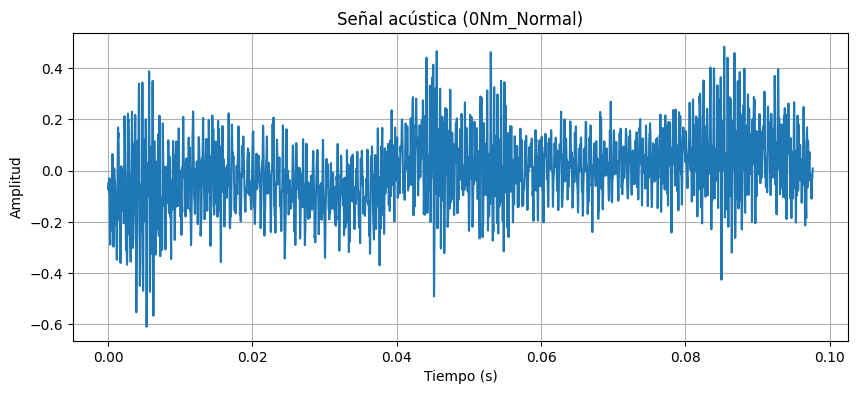

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(t[:5000], y[:5000])
plt.title("Señal acústica (0Nm_Normal)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


Claves en el archivo: dict_keys(['__header__', '__version__', '__globals__', 'Signal'])
Tiempo: (7680000,) Señal: (7680000, 4)


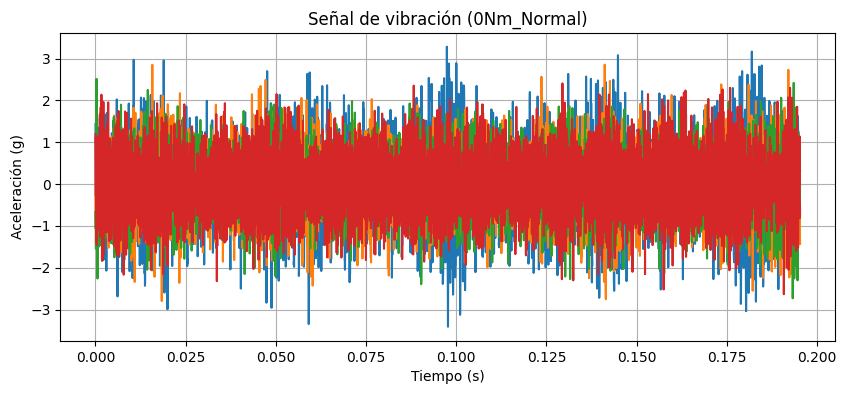

In [15]:
import scipy.io as sio
import os
import matplotlib.pyplot as plt
import numpy as np

# Ruta al archivo .mat de vibración (ajusta el nombre al que tengas)
mat_file = os.path.join(base_path, "vibration", "0Nm_Normal.mat")
mat_data = sio.loadmat(mat_file, struct_as_record=False, squeeze_me=True)

print("Claves en el archivo:", mat_data.keys())

# Extraer el contenedor (igual que con acoustic)
signal_container = mat_data['Signal']

# Eje de tiempo
start = signal_container.x_values.start_value
dt = signal_container.x_values.increment
n = signal_container.x_values.number_of_values
t = start + dt * np.arange(n)

# Señal de vibración
y = signal_container.y_values.values.squeeze()

print("Tiempo:", t.shape, "Señal:", y.shape)

# Graficar
plt.figure(figsize=(10,4))
plt.plot(t[:5000], y[:5000])
plt.title("Señal de vibración (0Nm_Normal)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (g)")
plt.grid(True)
plt.show()


In [16]:
# 1. Acústica
print("✅ Acústica:", t.shape, y.shape)

# 2. Vibración
print("✅ Vibración:", t.shape, y.shape)  # (ajusta variables si usas otro nombre)

# 3. Corriente/Temperatura desde TDMS
from nptdms import TdmsFile

tdms_file = os.path.join(base_path, "current,temp", "2Nm_Unbalance_2239mg.tdms")
tdms_data = TdmsFile.read(tdms_file)

for group in tdms_data.groups():
    for channel in group.channels():
        print("✅ Variable externa:", channel.name, "muestras:", len(channel))


✅ Acústica: (7680000,) (7680000, 4)
✅ Vibración: (7680000,) (7680000, 4)
✅ Variable externa: cDAQ9185-1F486B5Mod1/ai0 muestras: 3072983
✅ Variable externa: cDAQ9185-1F486B5Mod1/ai1 muestras: 3072983
✅ Variable externa: cDAQ9185-1F486B5Mod2/ai0 muestras: 3072983
✅ Variable externa: cDAQ9185-1F486B5Mod2/ai2 muestras: 3072983
✅ Variable externa: cDAQ9185-1F486B5Mod2/ai3 muestras: 3072983


In [17]:
import scipy.io as sio
import os

carpeta_mat = "/content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/acoustic"

for fname in os.listdir(carpeta_mat):
    if fname.endswith(".mat"):
        ruta = os.path.join(carpeta_mat, fname)
        mat_data = sio.loadmat(ruta, squeeze_me=True, struct_as_record=False)

        # Generalmente están dentro de "Signal"
        signal = mat_data['Signal']
        x_values = signal.x_values

        dt = x_values.increment
        fs = 1.0 / dt
        n_samples = x_values.number_of_values
        duracion = n_samples * dt

        print(f"📂 {fname}")
        print(f"   Muestras: {n_samples}")
        print(f"   Δt: {dt:.6e} s → fs: {fs:.2f} Hz")
        print(f"   Duración total: {duracion:.2f} s\n")


📂 0Nm_BPFI_03.mat
   Muestras: 3072000
   Δt: 1.953125e-05 s → fs: 51200.00 Hz
   Duración total: 60.00 s

📂 0Nm_BPFI_10.mat
   Muestras: 3072000
   Δt: 1.953125e-05 s → fs: 51200.00 Hz
   Duración total: 60.00 s

📂 0Nm_BPFO_03.mat
   Muestras: 3072000
   Δt: 1.953125e-05 s → fs: 51200.00 Hz
   Duración total: 60.00 s

📂 0Nm_BPFO_10.mat
   Muestras: 3072000
   Δt: 1.953125e-05 s → fs: 51200.00 Hz
   Duración total: 60.00 s

📂 0Nm_Normal.mat
   Muestras: 3072000
   Δt: 1.953125e-05 s → fs: 51200.00 Hz
   Duración total: 60.00 s



In [18]:
from nptdms import TdmsFile
import os

carpeta_tdms = "/content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/current,temp"

for fname in os.listdir(carpeta_tdms):
    if fname.endswith(".tdms"):
        ruta = os.path.join(carpeta_tdms, fname)
        tdms_file = TdmsFile.read(ruta)

        for group in tdms_file.groups():
            for channel in group.channels():
                n_samples = len(channel[:])
                dt = channel.properties.get("wf_increment", None)  # paso de tiempo
                fs = 1.0 / dt if dt else None

                print(f"📂 {fname} → canal: {channel.name}")
                print(f"   Muestras: {n_samples}")
                if dt:
                    print(f"   Δt: {dt:.6e} s → fs: {fs:.2f} Hz")
                    print(f"   Duración total: {n_samples*dt:.2f} s")
                print()


📂 0Nm_BPFI_03.tdms → canal: cDAQ9185-1F486B5Mod1/ai0
   Muestras: 1536492
   Δt: 3.905000e-05 s → fs: 25608.19 Hz
   Duración total: 60.00 s

📂 0Nm_BPFI_03.tdms → canal: cDAQ9185-1F486B5Mod1/ai1
   Muestras: 1536492
   Δt: 3.905000e-05 s → fs: 25608.19 Hz
   Duración total: 60.00 s

📂 0Nm_BPFI_03.tdms → canal: cDAQ9185-1F486B5Mod2/ai0
   Muestras: 1536492
   Δt: 3.905000e-05 s → fs: 25608.19 Hz
   Duración total: 60.00 s

📂 0Nm_BPFI_03.tdms → canal: cDAQ9185-1F486B5Mod2/ai2
   Muestras: 1536492
   Δt: 3.905000e-05 s → fs: 25608.19 Hz
   Duración total: 60.00 s

📂 0Nm_BPFI_03.tdms → canal: cDAQ9185-1F486B5Mod2/ai3
   Muestras: 1536492
   Δt: 3.905000e-05 s → fs: 25608.19 Hz
   Duración total: 60.00 s

📂 0Nm_BPFI_10.tdms → canal: cDAQ9185-1F486B5Mod1/ai0
   Muestras: 1536492
   Δt: 3.905000e-05 s → fs: 25608.19 Hz
   Duración total: 60.00 s

📂 0Nm_BPFI_10.tdms → canal: cDAQ9185-1F486B5Mod1/ai1
   Muestras: 1536492
   Δt: 3.905000e-05 s → fs: 25608.19 Hz
   Duración total: 60.00 s

📂 0Nm_

In [19]:
sig = mat_data["Signal"]
print(type(sig))
print(dir(sig))
print(sig.__dict__.keys())


<class 'scipy.io.matlab._mio5_params.mat_struct'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'function_record', 'x_values', 'y_values']
dict_keys(['_fieldnames', 'x_values', 'y_values', 'function_record'])


In [4]:
import os
import numpy as np
from scipy.io import loadmat
from nptdms import TdmsFile
from scipy.signal import resample_poly

# Rutas a las carpetas
mat_folder = "/content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/acoustic"
tdms_folder = "/content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/current,temp"

data = {}

# ================================
#  LECTURA ARCHIVOS .MAT (ACÚSTICO)
# ================================
for file in os.listdir(mat_folder):
    if file.endswith(".mat"):
        name = file.replace(".mat", "")
        mat_data = loadmat(os.path.join(mat_folder, file),
                           squeeze_me=True,
                           struct_as_record=False)

        signal_obj = mat_data["Signal"]
        if isinstance(signal_obj, np.ndarray):
            signal_obj = signal_obj.item()

        x_vals = signal_obj.x_values
        y_vals = signal_obj.y_values

        # Señal y parámetros
        signal = y_vals.__dict__["values"].flatten()
        dt = float(x_vals.__dict__["increment"])
        fs = 1/dt
        duration = len(signal) / fs

        if name not in data:
            data[name] = {}

        data[name]["acoustic"] = {
            "signal": signal,
            "fs": fs,
            "duration": duration
        }

# =========================================
#  LECTURA ARCHIVOS .TDMS (VIBRACIÓN + EXT)
# =========================================
for file in os.listdir(tdms_folder):
    if file.endswith(".tdms"):
        name = file.replace(".tdms", "")
        tdms_file = TdmsFile.read(os.path.join(tdms_folder, file))

        if name not in data:
            data[name] = {}

        vibration = {}
        external = {}

        for group in tdms_file.groups():
            for channel in group.channels():
                sig = channel[:]

                # Si no existe wf_increment, usar valor fijo
                if "wf_increment" in channel.properties:
                    dt = channel.properties["wf_increment"]
                else:
                    dt = 3.905e-05  # tu dt conocido
                fs = 1.0 / dt

                # Canal completo
                ch_full = f"{group.name}/{channel.name}".lower()

                if "mod1/ai0" in ch_full:
                    vibration["accel_1"] = {"signal": sig, "fs": fs}
                elif "mod1/ai1" in ch_full:
                    vibration["accel_2"] = {"signal": sig, "fs": fs}
                elif "mod2/ai0" in ch_full:
                    external["current"] = sig
                elif "mod2/ai2" in ch_full:
                    external["temperature"] = sig
                elif "mod2/ai3" in ch_full:
                    external["extra"] = sig

        data[name]["vibration"] = vibration
        data[name]["external"] = external

# =====================
#  SINCRONIZACIÓN DATOS
# =====================
fs_target = 25600  # Hz

for name, content in data.items():
    # --- Acoustic ---
    if "acoustic" in content:
        sig = content["acoustic"]["signal"]
        fs = content["acoustic"]["fs"]
        if int(fs) == 51200:  # bajar de 51.2 kHz a 25.6 kHz
            sig_resampled = resample_poly(sig, up=1, down=2)
            content["acoustic"]["signal_sync"] = sig_resampled
            content["acoustic"]["fs_sync"] = fs_target
        else:
            content["acoustic"]["signal_sync"] = sig
            content["acoustic"]["fs_sync"] = fs

    # --- Vibration ---
    if "vibration" in content:
        for k, v in content["vibration"].items():
            sig = v["signal"]
            fs = v["fs"]
            if int(fs) != fs_target:
                sig_resampled = resample_poly(sig, up=fs_target, down=int(fs))
                v["signal_sync"] = sig_resampled
                v["fs_sync"] = fs_target
            else:
                v["signal_sync"] = sig
                v["fs_sync"] = fs

# --- tu bloque de sincronización termina aquí ---
    if "external" in content:
        for k, sig in content["external"].items():
            content["external"][k] = {
                "signal_sync": sig,
                "fs_sync": fs_target
            }

# =====================
#   ELIMINAR DUPLICADOS
# =====================
for name in data:
    if "acoustic" in data[name]:
        data[name]["acoustic"].pop("signal", None)   # borrar señal original
        data[name]["acoustic"].pop("fs", None)       # opcional, dejar solo fs_sync
        data[name]["acoustic"].pop("duration", None) # opcional, si no lo usas

    if "vibration" in data[name]:
        for k in data[name]["vibration"]:
            data[name]["vibration"][k].pop("signal", None)  # borrar original
            data[name]["vibration"][k].pop("fs", None)      # opcional


In [5]:
import numpy as np

# Guardar dataset completo
np.savez_compressed("dataset_sync.npz", data=data)


In [6]:
import h5py

with h5py.File("dataset_sync.h5", "w") as h5f:
    for file_id, content in data.items():
        grp = h5f.create_group(file_id)

        # Acoustic
        if "acoustic" in content:
            grp.create_dataset("acoustic/signal_sync", data=content["acoustic"]["signal_sync"], compression="gzip")
            grp.attrs["fs_acoustic"] = content["acoustic"]["fs_sync"]

        # Vibration
        if "vibration" in content:
            vib_grp = grp.create_group("vibration")
            for k, v in content["vibration"].items():
                vib_grp.create_dataset(f"{k}/signal_sync", data=v["signal_sync"], compression="gzip")
                vib_grp[k].attrs["fs"] = v["fs_sync"]

        # External
        if "external" in content:
            ext_grp = grp.create_group("external")
            for k, v in content["external"].items():
                ext_grp.create_dataset(f"{k}/signal_sync", data=v["signal_sync"], compression="gzip")
                ext_grp[k].attrs["fs"] = v["fs_sync"]


In [25]:
tdms_file = TdmsFile.read("/content/drive/MyDrive/Codigos_Fallos/Carpeta_Datos_Fuzzy/current,temp/0Nm_BPFI_03.tdms")
print([ch.name for g in tdms_file.groups() for ch in g.channels()])


['cDAQ9185-1F486B5Mod1/ai0', 'cDAQ9185-1F486B5Mod1/ai1', 'cDAQ9185-1F486B5Mod2/ai0', 'cDAQ9185-1F486B5Mod2/ai2', 'cDAQ9185-1F486B5Mod2/ai3']


In [27]:
file_id = "0Nm_BPFI_03"

# Acoustic
acoustic = data[file_id]["acoustic"]["signal_sync"]

# Vibración
accel_1 = data[file_id]["vibration"]["accel_1"]["signal_sync"]
accel_2 = data[file_id]["vibration"]["accel_2"]["signal_sync"]

# Externas
current = data[file_id]["external"]["current"]["signal_sync"]
temperature = data[file_id]["external"]["temperature"]["signal_sync"]


/tmp/ipython-input-1896721570.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


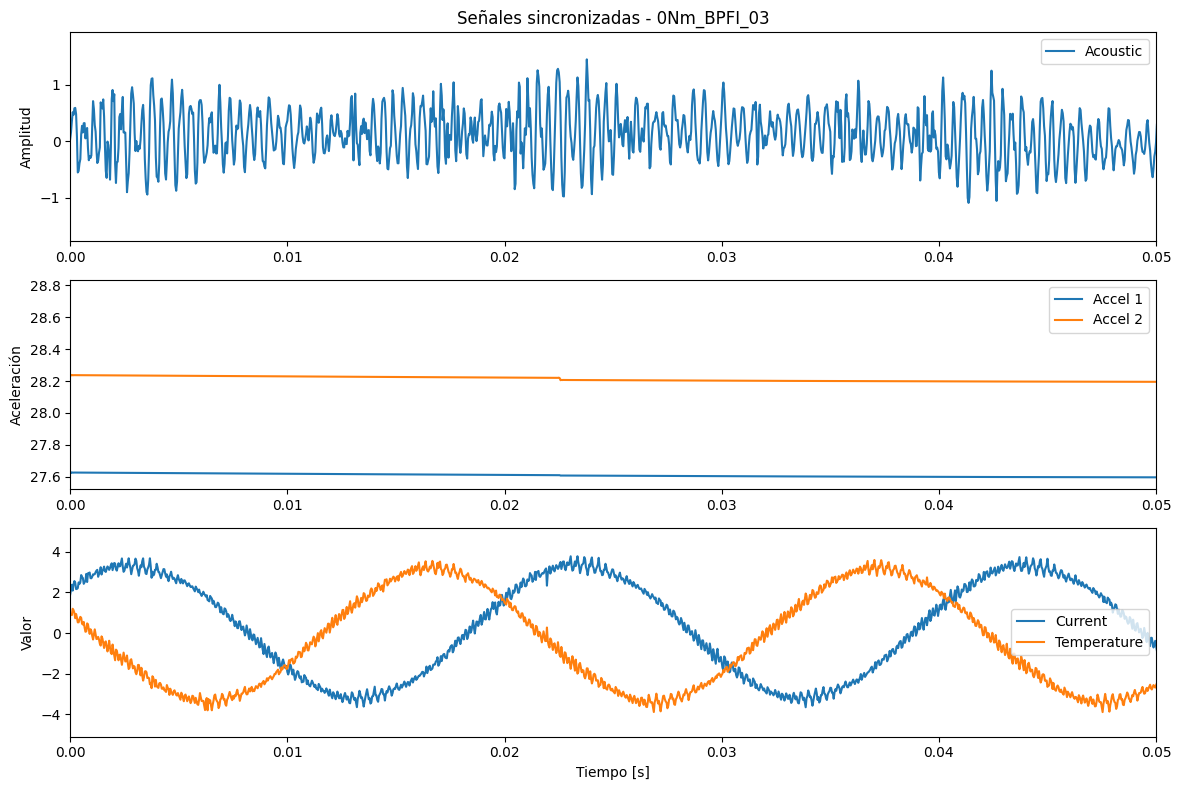

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Selecciona un archivo de ejemplo
file_id = "0Nm_BPFI_03"   # <-- cámbialo si quieres otro

# Tiempo de visualización (en segundos)
t_max = 0.05

# --- Acoustic ---
acoustic = data[file_id]["acoustic"]["signal_sync"]
fs = data[file_id]["acoustic"]["fs_sync"]
t_acoustic = np.arange(len(acoustic)) / fs

# --- Vibración ---
accel_1 = data[file_id]["vibration"].get("accel_1", {}).get("signal_sync")
accel_2 = data[file_id]["vibration"].get("accel_2", {}).get("signal_sync")
t_vib = np.arange(len(accel_1)) / fs if accel_1 is not None else None

# --- Externas ---
current = data[file_id]["external"].get("current", {}).get("signal_sync")
temperature = data[file_id]["external"].get("temperature", {}).get("signal_sync")
t_ext = np.arange(len(current)) / fs if current is not None else None

# ============================
# Plot comparativo
# ============================
plt.figure(figsize=(12, 8))

# Acoustic
plt.subplot(3, 1, 1)
plt.plot(t_acoustic, acoustic, label="Acoustic")
plt.xlim(0, t_max)
plt.title(f"Señales sincronizadas - {file_id}")
plt.ylabel("Amplitud")
plt.legend()

# Vibración
plt.subplot(3, 1, 2)
if accel_1 is not None:
    plt.plot(t_vib, accel_1, label="Accel 1")
if accel_2 is not None:
    plt.plot(t_vib, accel_2, label="Accel 2")
plt.xlim(0, t_max)
plt.ylabel("Aceleración")
plt.legend()

# Externas
plt.subplot(3, 1, 3)
if current is not None:
    plt.plot(t_ext, current, label="Current")
if temperature is not None:
    plt.plot(t_ext, temperature, label="Temperature")
plt.xlim(0, t_max)
plt.xlabel("Tiempo [s]")
plt.ylabel("Valor")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Guardar dataset completo
np.savez_compressed("dataset_sync.npz", data=data)
